# 1. EDA

### Cargar librerias

In [50]:
from pprint import pprint
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

### Cargar datos y crear DF

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Identifiquemos las columnas

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

-'customerID' -> Cada registro corresponde a un cliente, por lo cual si hay ID repetidos habría información duplicada.

-'gender' -> Sexo, solo dos posibles opciones.

-'SeniorCitizen' -> Adulto mayor o no, para este caso consideraremos adulto mayor a las personas con 60 años o más (https://www.forbes.com/health/healthy-aging/senior-citizen-age/)

-'Partner' -> Pareja (Si o No)

-'Dependents' -> Personas a cargo

-'tenure' -> Meses que el cliente ha permanecido en la compañia

-'PhoneService'-> Servicio de telefono (Si o No)

-'MultipleLines'-> Multiples lineas en caso de contar con servicio de telefono (3 posibles valores,si, no, sinservicio de telefonía)

-'InternetService' -> Tipo de servicio de internet (3 valores posibles FO, DSL, No)

-'OnlineSecurity'-> Servicio de seguridad online (3 valores, si, no, sin serviciod e internet)

-'OnlineBackup' -> El cliente dispone de copia de seguridad online (3 valores, si, no, sin servicio de internet)

-'DeviceProtection' -> Proteccion de dispositivos (3 valores, si, no, sin servicio de internet)

-'TechSupport' -> Soporte técnico (3 valores, si, no, sin servicio de internet)

-'StreamingTV' -> Servicio de streaming (3 valores, si, no, sin servicio de internet)

-'StreamingMovies' -> Streaming de películas (3 valores, si, no, sin servicio de internet)

-'Contract' -> Tipo de contrato (mes a mes, un año, dos años)

-'PaperlessBilling'-> Facturación electrónica (Si o No)

-'PaymentMethod' -> Método de pago (4 valores posibles)

-'MonthlyCharges' -> Cobro mensual

-'TotalCharges' -> Total cobrado

-'Churn' -> Si el cliente se ha retirado de la compañia (Si o No)


Este analisis lo hice con el fin de entender el contexto de los datos para su interpretación y analizar los posibles valores que puede tener cada serie.


### Verificación de valores inapropiados

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Interpretación:

- **SeniorCitizen:** Sabemos que sus valores pueden ser 0 o 1, de lo anterior vemos que su máximo es 1 y su mínimo 0 lo cual tiene mucho sentido y no presenta errores.

- **tenure:** Teniendo en cuenta que son meses de permanencia no tiene mucho sentido hablar de valores negativos o de valores que sean 0, como vemos en la información anterior su mínimo es 0 lo cual no tiene mucho sentido.

- **MontlyCharges:** El valor de los cargos mensuales podría presentar problemas con valores iguales a cero o valores negativos, si analizamos su máximo y minimo vemos que son valores razonbles y no se presenta problema.


In [12]:
df[df['tenure'] ==0]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Como se puede ver con el filtro anterior, hay 11 registros que tienen un tenure = 0 el cual no tiene mucho sentido y por eso decido eliminar estos registros del df.

**Nota:** Los 11 registros representan un 0.15% del total de registros lo cual no es muy significativo.

In [17]:
df = df[df['tenure'] != 0]
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Análisis de valores nulos y tipos de datos.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

**Análisis:**

- No hay valores nulos en el DF

- El tipo de dato de TotalCharges es de tipo string lo cual es incorrecto, por lo tanto, se cambiará a tipo float

In [19]:
df = df.astype({'TotalCharges': 'float64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### Registros duplicados

In [22]:
df[df.duplicated('customerID', keep=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


**Análisis:**

- Un registro duplicado sería uno en el cual el customerID fuera igual, pero como vemos del filtro anterior no hay registros con el mismo customerID

### Valores únicos

En este apartado lo que hice fue crear un diccionario donde las claves son las colummnas y los valores son los valores únicos de cada columna.Para esto hice uso de un diccionario por comprensión. Es claro que no tiene mucho sentido hablar de valores unicos en series como la del customerID pero solo quise aprovechar la facilidad de los diccionarios por comprensión para analizar el resto de series.

C0mo se puede observar los valores únicos de cada serie son iguales a los del análisis de las columnas que se hizo al inicio, en especial para para valores categóricos. Se concluye que no hay inconsistencias y no se modifica el df como lo llevamos hasta el momento.

In [26]:
unique_values = {col: df[col].unique() for col in df.columns}

pprint(unique_values)

{'Churn': array(['No', 'Yes'], dtype=object),
 'Contract': array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'DeviceProtection': array(['No', 'Yes', 'No internet service'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'MonthlyCharges': array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ]),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'OnlineBackup': array(['Yes', 'No', 'No internet service'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'PaperlessBilling': array(['Yes', 'No'], dtype=object),
 'Partner': array(['Yes', 'No'], dtype=object),
 'PaymentMethod': array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'SeniorCitizen': array([0, 1], dtype=int64),
 'StreamingMovies': array([

# 2. Exploración de datos con python

### Visualizaciones univariadas

Lo primero que quiero hacer es tener dos DF, uno con los clientes actuales y otro con los retirados.

In [46]:
df_clientes_actuales = df[df['Churn'] == 'No']
ca_gender_counts = df_clientes_actuales['gender'].value_counts()
ca_gender_counts

gender
Male      2619
Female    2544
Name: count, dtype: int64

In [66]:
df_clientes_retirados =df[df['Churn'] == 'Yes']
cr_gender_counts = df_clientes_retirados['gender'].value_counts().sort_values()
cr_gender_counts

gender
Male      930
Female    939
Name: count, dtype: int64

#### Pie chart - Porcentaje de hombres y mujeres en clientes actuales y retirados.

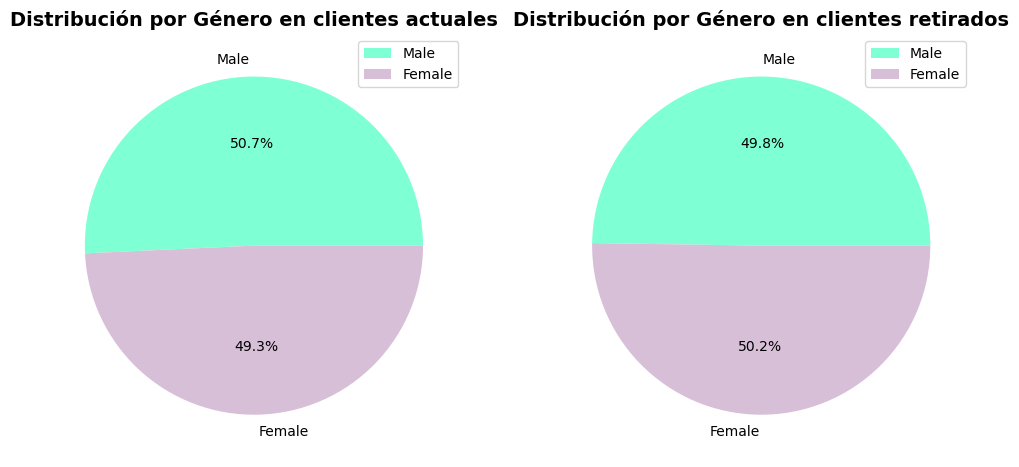

In [100]:
fig1, ax1 = plt.subplots(1,2, figsize=(12,6))

# Clientes actuales distribución de genero 
ax1[0].pie(ca_gender_counts, 
           labels=ca_gender_counts.index, 
           autopct='%1.1f%%',
           colors = ['aquamarine','thistle'])
ax1[0].set_title('Distribución por Género en clientes actuales',
                 fontsize = 14,
                 fontweight = 'bold')
ax1[0].legend()

# Clientes retirados distribución de genero 
ax1[1].pie(cr_gender_counts, 
           labels=cr_gender_counts.index, 
           autopct='%1.1f%%',
           colors = ['aquamarine','thistle'])
ax1[1].set_title('Distribución por Género en clientes retirados',
                 fontsize = 14,
                 fontweight = 'bold')
ax1[1].legend();

**Análisis:** En este primer gráfico se puede apreciar que no hay un desbalance en el género tanto en los clientes actuales como enlos retirados.

#### Histograma - Distribución de los tiempos de permanencia de los clientes (Tenure).

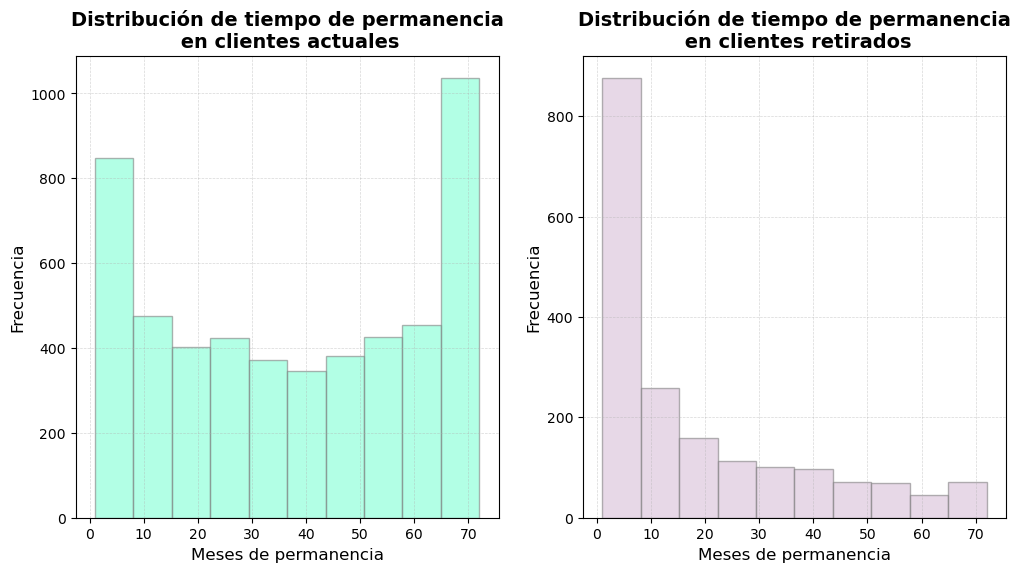

In [101]:
fig2, ax2 = plt.subplots(1,2, figsize=(12,6))

# Clientes actuales distribución de tiempo de permanencia 

ax2[0].hist(df_clientes_actuales['tenure'],
            bins=10,
            alpha=0.6,
            color='aquamarine',
            edgecolor='grey',
            linewidth=1)

ax2[0].set_title(f'Distribución de tiempo de permanencia\n en clientes actuales',
                 fontsize = 14,
                 fontweight = 'bold')

ax2[0].set_xlabel('Meses de permanencia', fontsize=12)
ax2[0].set_ylabel('Frecuencia', fontsize=12)

ax2[0].grid(True,
            linestyle='--',
            linewidth=0.5,
            alpha=0.5)


# Clientes retirados distribución de tiempo de permanencia 

ax2[1].hist(df_clientes_retirados['tenure'],
            bins=10,
            alpha=0.6,
            color='thistle',
            edgecolor='grey',
            linewidth=1)

ax2[1].set_title(f'Distribución de tiempo de permanencia\n en clientes retirados',
                 fontsize = 14,
                 fontweight = 'bold')

ax2[1].set_xlabel('Meses de permanencia', fontsize=12)
ax2[1].set_ylabel('Frecuencia', fontsize=12)
ax2[1].grid(True,
            linestyle='--',
            linewidth=0.5,
            alpha=0.5)


**Análisis:**

- En los clientes actuales vemos dos extremos, el primeroes que hay clientes que llevan menos de 1 año lo cual es bueno porque quiere decir que se estáteniendo entrada de clientes nuevos, el otro extremos son los clientes que llevan más de 60 meses lo cual tambíen es bueno ya que pueden estar satisfechos con el servicio.

- En los clientes retirados podemos ver que la mayoría de los clientes que se han retirado lo han hecho en menos de un año, esto puede ser un dato valioso para la compañía y prestar atención a los clientes durante su primer año.

### Visualizaciones multivariadas

Voy a utilizar el método corr de pandas en eldf de clientes retirados para ver la correlación entre las variables númericas y a partir de ahí sacar los gráficos

In [114]:
numeric_Df = df_clientes_retirados.select_dtypes(include=['number'])
numeric_Df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.091444,0.148682,0.099574
tenure,0.091444,1.000000,0.401286,0.954017
MonthlyCharges,0.148682,0.401286,1.000000,0.545772
TotalCharges,0.099574,0.954017,0.545772,1.000000


#### Diagrama de dispersión - Tenues VS Monthly Charges

Text(0, 0.5, 'Cargos Mensuales ($)')

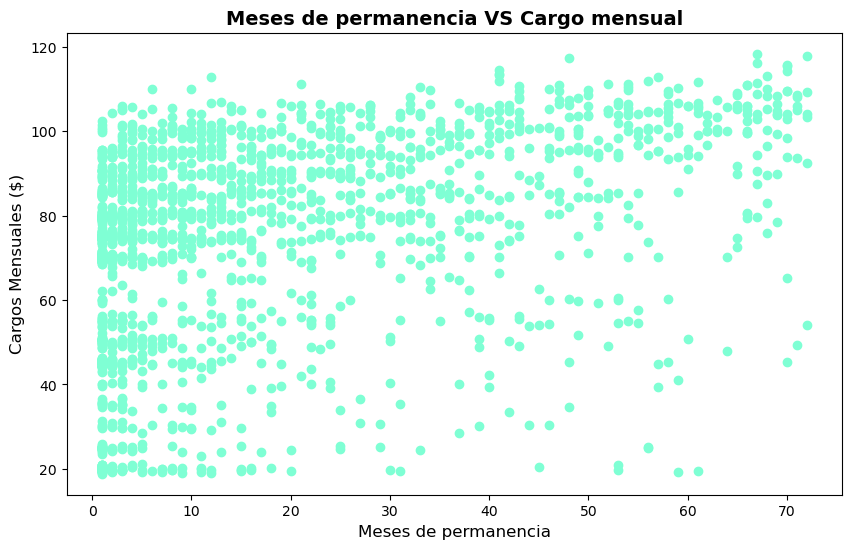

In [130]:
fig3, ax3 = plt.subplots( figsize=(10,6))

ax3.scatter(df_clientes_retirados['tenure'],
            df_clientes_retirados['MonthlyCharges'],
            # alpha=0.5,
            color='aquamarine');

ax3.set_title('Meses de permanencia VS Cargo mensual',
                 fontsize = 14,
                 fontweight = 'bold')

ax3.set_xlabel('Meses de permanencia', fontsize=12)
ax3.set_ylabel('Cargos Mensuales ($)', fontsize=12)


**Análisis:** Del gráfico anterior vemos que los meses depermanencia de los clientes tienen una relación considerable con los cargos mensuales de los mismos, es posible que el valor de las facturas haya sido una causal para el retiro.

### Columnas apiladas - Tiempo de permanencia por tipo de contrato

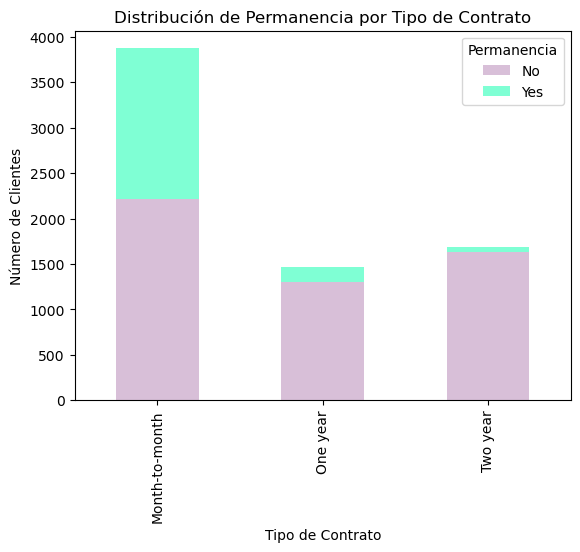

In [143]:

contract_churn = pd.crosstab(df['Contract'], df['Churn'])
contract_churn.plot(kind='bar', 
                    stacked=True,
                    color=['thistle','aquamarine'])

plt.title('Distribución de Permanencia por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Permanencia')
plt.show()

**Análisis:** Vemos que muchas de las personas con un contrato tipo mes a mes ya no hacen parte de la empresa por lo cual se debería prestar mayor atención a este tipo de contrato y tratar de ofrecer contratos máx extensos.